<a href="https://colab.research.google.com/github/Aiswaryabinu/House-price-prediction/blob/main/priceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

Reading of csv file

In [3]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(545, 13)

In [7]:
df.shape

(545, 13)

Preprocessing of data

In [10]:
df.isnull().sum() #no null values

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Changing of yes/no to 1/0

In [33]:
features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in features:
    if col in data.columns:
        data[col] = data[col].apply(lambda x: 1 if x == "yes" else 0)
    else:
        print(f"Column '{col}' not found in the DataFrame.")

In [35]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [39]:
#changing  the values of furnishingstatus to numerical
hash_set={
    'unfurnished':0,
    'semi-furnished':1,
    'furnished':2
}

In [37]:
for col in ['furnishingstatus']:
    data[col]=data[col].map(hash_set)

In [38]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [45]:
x=data.drop('price',axis=1)
y=data['price']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [48]:
print(x_train)

      area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
272   4075         3          1        1         1          1         1   
40    6550         3          1        2         1          0         1   
326   4100         4          1        1         0          0         1   
441   4370         3          1        2         1          0         0   
511   3180         3          1        1         0          0         0   
..     ...       ...        ...      ...       ...        ...       ...   
129  11460         3          1        3         1          0         0   
144   4700         4          1        2         1          1         1   
72    5020         3          1        4         1          0         0   
235   5680         3          1        2         1          1         0   
37    9000         4          2        4         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
272                0  

In [49]:
print(y_train)

272    4340000
40     7875000
326    3990000
441    3220000
511    2520000
        ...   
129    5873000
144    5600000
72     6720000
235    4620000
37     7980000
Name: price, Length: 436, dtype: int64


Fitting of linear regression model

In [51]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

Model Evaluation

In [52]:
print(model.score(x_train,y_train))


0.6946575070270331


In [54]:
y_pred=model.predict(x_test)

In [66]:
MSE=mean_squared_error(y_test,y_pred)
print("Mean squared error : ",MSE)

Mean squared error :  1602773742287.9998


In [61]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.6183140939593399


In [64]:
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute error :",mae)

Mean absolute error : 898629.2950371035


Plotting

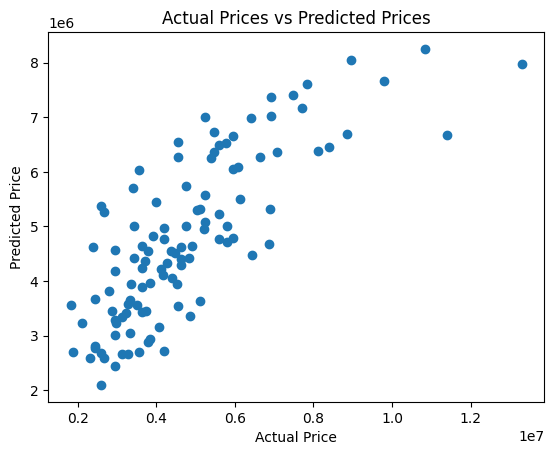

In [72]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

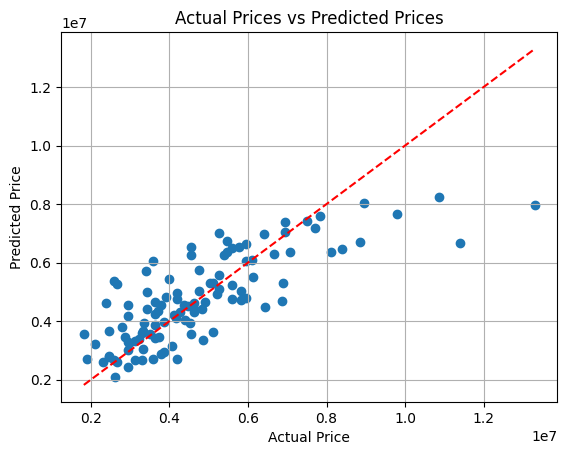

In [74]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree reference line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.grid()
plt.show()

In [76]:
intercept = model.intercept_
coefficients = pd.Series(model.coef_, index=x.columns)

print("Intercept:", intercept)
print("Coefficients:\n", coefficients)

Intercept: -312339.4240061268
Coefficients:
 area                2.344747e+02
bedrooms            9.576997e+04
bathrooms           1.039628e+06
stories             4.931340e+05
mainroad            4.310575e+05
guestroom           3.280976e+05
basement            4.910099e+05
hotwaterheating     9.408724e+05
airconditioning     6.693352e+05
parking             2.637637e+05
prefarea            5.892904e+05
furnishingstatus    1.983943e+05
dtype: float64
